In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
#Reads the file

file = tf.keras.utils

raw_df = pd.read_csv(r"C:\Users\emma_\Downloads\Dataset_13_5_2022.csv", delimiter=';')
raw_df.head()


,Villa(Booli),Lägenhet(Booli),Radhus(Booli),Tomt/Mark(Booli),Kedjehus(Booli),Parhus(Booli),Fritidshus(Booli),BoArea(Booli),TomArea(Booli),Våningar(Booli),...,1931-1940(Booli),1941-1950(Booli),1951-1960(Booli),1961-1970(Booli),1971-1980(Booli),1981-1990(Booli),1991-2000(Booli),2001-2010(Booli),2011-2022(Booli),Label
0,1,0,0,0,0,0,0,0.540862,0.088945,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0.445765,0.203518,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0.436850,0.207035,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0.502229,0.346734,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0.274889,0.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:

raw_df.describe()

,Villa(Booli),Lägenhet(Booli),Radhus(Booli),Tomt/Mark(Booli),Kedjehus(Booli),Parhus(Booli),Fritidshus(Booli),BoArea(Booli),TomArea(Booli),Våningar(Booli),...,1931-1940(Booli),1941-1950(Booli),1951-1960(Booli),1961-1970(Booli),1971-1980(Booli),1981-1990(Booli),1991-2000(Booli),2001-2010(Booli),2011-2022(Booli),Label
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,0.287102,0.474382,0.126325,0.003534,0.082155,0.022968,0.003534,0.314498,0.114393,1.212898,...,0.022085,0.094523,0.063604,0.166078,0.213781,0.083922,0.053004,0.109541,0.037102,0.469965
std,0.452610,0.499564,0.332362,0.059365,0.274723,0.149868,0.059365,0.121258,0.156540,1.854021,...,0.147024,0.292684,0.244154,0.372315,0.410155,0.277394,0.224140,0.312454,0.189096,0.499318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293462,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389302,0.204146,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.908543,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Shows the attributes datatype.

raw_df.dtypes

Villa(Booli)                            int64
Lägenhet(Booli)                         int64
Radhus(Booli)                           int64
Tomt/Mark(Booli)                        int64
Kedjehus(Booli)                         int64
Parhus(Booli)                           int64
Fritidshus(Booli)                       int64
BoArea(Booli)                         float64
TomArea(Booli)                        float64
Våningar(Booli)                         int64
Ospecificerad(VASYD)                    int64
Småhus friliggande(VASYD)               int64
Flerfamiljshus(VASYD)                   int64
Småhus radhus(VASYD)                    int64
Småhus med flera lägenheter(VASYD)      int64
Småhus kedjehus(VASYD)                  int64
LIMHAMN-BUNKEFLO(VASYD)                 int64
FOSIE(VASYD)                            int64
HUSIE(VASYD)                            int64
HYLLIE(VASYD)                           int64
KIRSEBERG(VASYD)                        int64
VÄSTRA INNERSTADEN(VASYD)         

In [6]:
# Examine the class label imbalance

no_basement, basement = np.bincount(raw_df['Label'])
total = no_basement + basement
print('Examples:\n    Total: {}\n    Utan källare: {} ({:.2f}% of total)\n'.format(
    total, no_basement, 100 * no_basement / total))

Examples:
    Total: 1132
    Utan källare: 600 (53.00% of total)



In [7]:
# put the attributes in X and the Label in  y.

X= raw_df.copy()
y = X.pop('Label')

In [8]:
# Split the dataset into train, validation, and test sets. The validation set is used during the model fitting 
# to evaluate the loss and any metrics, however the model is not fit with this data. 
# The test set is completely unused during the training phase and is only used at the end to 
# evaluate how well the model generalizes to new data. 

# Use a utility from sklearn to split and shuffle your dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20)


In [9]:
# Form np arrays of labels and features.
train_labels = np.array(y_train)
bool_train_labels = train_labels != 0
val_labels = np.array(y_val)
test_labels = np.array(y_test)

train_features = np.array(X_train)
val_features = np.array(X_val)
test_features = np.array(X_test)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (724,)
Validation labels shape: (181,)
Test labels shape: (227,)
Training features shape: (724, 36)
Validation features shape: (181, 36)
Test features shape: (227, 36)


In [10]:
# Define the model and metrics
# Afunction that creates a simple neural network with a densly connected hidden layer, 
# a dropout layer to reduce overfitting, 
# and an output sigmoid layer that returns the probability of basement or no basement


METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.0),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

# Understanding useful metrics
Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.

False negatives and false positives are samples that were incorrectly classified

True negatives and true positives are samples that were correctly classified

Accuracy is the percentage of examples correctly classified > 

Precision is the percentage of predicted positives that were correctly classified > 

Recall is the percentage of actual positives that were correctly classified > 

AUC refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than a random negative sample.

AUPRC refers to Area Under the Curve of the Precision-Recall Curve. This metric computes precision-recall pairs for different probability thresholds.

In [11]:
# Build the model

EPOCHS = 40
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                592       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Training the model

model = make_model()

baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/40
23/23 [==============================] - 4s 58ms/step - loss: 0.7504 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 402.0000 - fn: 322.0000 - accuracy: 0.5552 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4659 - prc: 0.4334 - val_loss: 0.7486 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 85.0000 - val_fn: 96.0000 - val_accuracy: 0.4696 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6242 - val_prc: 0.6474
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6679 - tp: 25.0000 - fp: 8.0000 - tn: 394.0000 - fn: 297.0000 - accuracy: 0.5787 - precision: 0.7576 - recall: 0.0776 - auc: 0.6689 - prc: 0.6215 - val_loss: 0.6621 - val_tp: 20.0000 - val_fp: 1.0000 - val_tn: 84.0000 - val_fn: 76.0000 - val_accuracy: 0.5746 - val_precision: 0.9524 - val_recall: 0.2083 - val_auc: 0.7830 - val_prc: 0.8031
Epoch 3/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6116 - tp: 124.0000 - fp: 21.0000 - tn: 381.0000 - fn: 198.0000 - a

In [14]:
# Check training history
# by producing plots of your model's accuracy and loss on the training and validation set. 
# These are useful to check for overfitting
# (you can produce these plots for any of the metrics you created above.)

def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend();

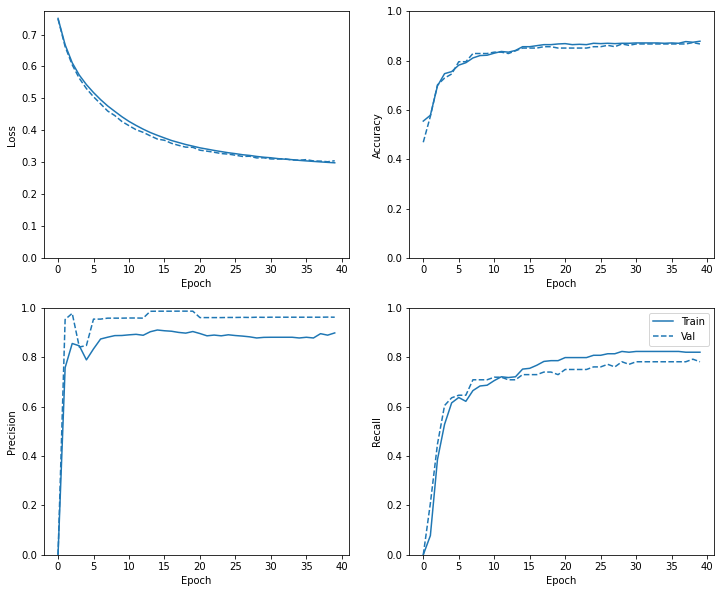

In [15]:
plot_metrics(baseline_history)

In [16]:
# Evaluate metrics
# You can use a confusion matrix to summarize the actual vs. predicted labels, 
# where the X axis is the predicted label and the Y axis is the actual label.

train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [17]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
   # sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate basement Detected (True Negatives): ', cm[0][0])
    print('Legitimate basement Incorrectly Detected (False Positives): ', cm[0][1])
    print('Building without basement Missed (False Negatives): ', cm[1][0])
    print('Building without basement (True Positives): ', cm[1][1])
    print('Total buildings without basements: ', np.sum(cm[1]))

loss :  0.3115089237689972
tp :  90.0
fp :  5.0
tn :  108.0
fn :  24.0
accuracy :  0.8722466826438904
precision :  0.9473684430122375
recall :  0.7894737124443054
auc :  0.9486881494522095
prc :  0.9536502361297607

Legitimate basement Detected (True Negatives):  108
Legitimate basement Incorrectly Detected (False Positives):  5
Building without basement Missed (False Negatives):  24
Building without basement (True Positives):  90
Total buildings without basements:  114


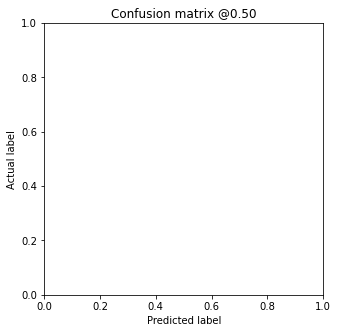

In [18]:
# Evaluate your model on the test dataset and display the results for the metrics created above.

baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [19]:
# Plot the ROC
# This plot is useful because it shows, at a glance, 
# the range of performance the model can reach just by tuning the output threshold.

def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

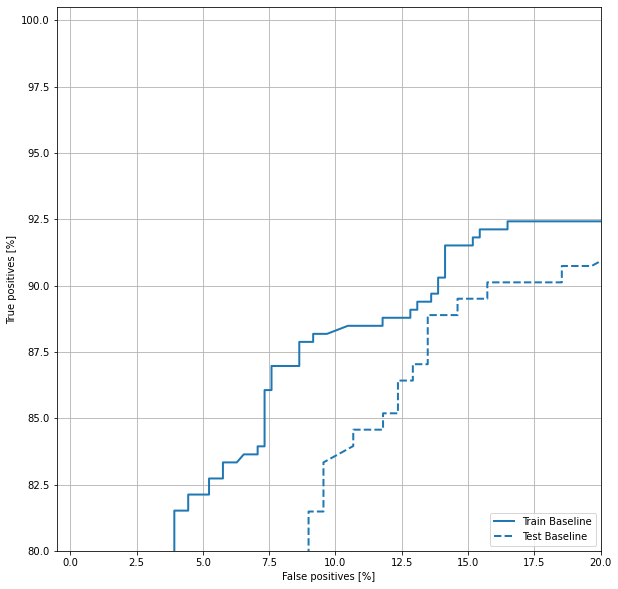

In [20]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

In [20]:
# Plot the AUPRC
# Area under the interpolated precision-recall curve, obtained by plotting (recall, precision) 
# points for different values of the classification threshold. 
# Depending on how it's calculated, PR AUC may be equivalent to the average precision of the model.

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    

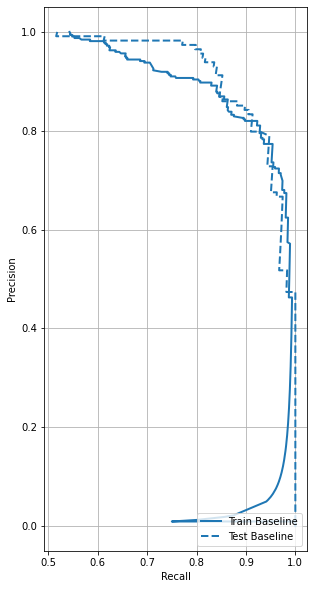

In [21]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

# Code for manually testing the model again.


In [23]:
test_file = pd.read_csv(r"C:\Users\emma_\Downloads\Testdata_20.csv", delimiter=';')
test_file.head()

,Villa(Booli),Lägenhet(Booli),Radhus(Booli),Tomt/Mark(Booli),Kedjehus(Booli),Parhus(Booli),Fritidshus(Booli),BoArea(Booli),TomArea(Booli),Våningar(Booli),...,1921-1930(Booli),1931-1940(Booli),1941-1950(Booli),1951-1960(Booli),1961-1970(Booli),1971-1980(Booli),1981-1990(Booli),1991-2000(Booli),2001-2010(Booli),2011-2022(Booli)
0,1,0,0,0,0,0,0,0.392273,0.453769,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0.248143,0.000000,3,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0.650817,0.502010,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0.472511,0.520100,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0.380386,0.274874,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
test_file.dtypes

Villa(Booli)                             int64
Lägenhet(Booli)                          int64
Radhus(Booli)                            int64
Tomt/Mark(Booli)                         int64
Kedjehus(Booli)                          int64
Parhus(Booli)                            int64
Fritidshus(Booli)                        int64
BoArea(Booli)                          float64
TomArea(Booli)                         float64
Våningar(Booli)                          int64
 Ospecificerad(VASYD)                    int64
 Småhus friliggande(VASYD)               int64
 Flerfamiljshus(VASYD)                   int64
 Småhus radhus(VASYD)                    int64
 Småhus med flera lägenheter(VASYD)      int64
 Småhus kedjehus(VASYD)                  int64
LIMHAMN-BUNKEFLO(VASYD)                  int64
FOSIE(VASYD)                             int64
HUSIE(VASYD)                             int64
HYLLIE(VASYD)                            int64
KIRSEBERG(VASYD)                         int64
VÄSTRA INNERS

In [25]:
result = model.predict(test_file)
    
result

array([[0.8951219 ],
       [0.9728284 ],
       [0.26493376],
       [0.15177086],
       [0.12548748],
       [0.04109159],
       [0.6428709 ],
       [0.9821727 ],
       [0.9966544 ],
       [0.92068386],
       [0.82395   ],
       [0.04787892],
       [0.17514282],
       [0.224383  ],
       [0.11271229],
       [0.3200245 ],
       [0.01016653],
       [0.13638625],
       [0.17363822],
       [0.33928066]], dtype=float32)

In [27]:
#Set the treshold for when it is a basement. In this case i put 70 %.

test_pred = []

for element in result:
    if element > 0.7:
        test_pred.append(1)
    else:
        test_pred.append(0)
        

In [28]:
test_pred

[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]